<a href="https://colab.research.google.com/github/Hsuyeon01/ESAA/blob/main/0509_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4. 분류 ##

### 1) 분류(classification)의 개요 ###

지도학습 : 레이블, 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방법

분류 : 지도학습의 대표적인 유형, 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것

- 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈 (Naive Bayes)
- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀 (Logisitic Regression)
- 데이터 균일도에 따른 규칙 기반의 결정 트리 (Decision Tree)
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신 (Support Vector Machine)
- 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
- 심층 연결 기반의 신경망 (Neural Network)
- 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블 (Ensemble)

**앙상블**

- 서로 다른/또는 알고리즘을 단순히 결합한 형태도 있으나, 일반적으로 배깅과 부스팅 방식으로 나눔
- 배깅 방식의 대표인 랜덤 포레스트(Random Forest)는 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용하는 알고리즘
- 부스팅 중 그래디언트 부스팅(Gradient Boosting)의 경우 뛰어난 예측 성능을 가지고 있지만 수행시간이 너무 오래 걸리는 단점으로 인해 최적화 모델 튜닝이 어려웠음
- 그러나 XgBoost(eXtra Gradient Boosting)와 LightGBM 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘이 계속 등장하면서 정형 데이터의 분류 영역에서 가장 활용도가 높은 알고리즘으로 자리잡음
- 앙상블은 대부분 동일한 알고리즘을 결합
- 앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 결정 트리 - 매우 쉽고 유연하고 적용될 수 있는 알고리즘이자 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음, 그러나 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합(overfitting)이 발생해 반대로 예측 성능이 저하될 수도 있다는 단점이 있음
- 하지만 앙상블은 매우 많은 여러 개의 약한 학습기(즉, 예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시키는데, 결정 트리가 좋은 약한 학습기가 됨.


### 2) 결정 트리 ###

결정트리 

- ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것
- 일반적으로 규칙을 가장 쉽게 표현하는 방법은 if/else 기반으로 나타내는 것
- 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우

결정트리의 구조

- 규칙 노드 : 규칙 조건
- 리프 노드 : 결정된 클래스 값
- 새로운 규칙 조건마다 서브 트리가 생성
- 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음

가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함 -> 어떻게 트리를 분할(split)할 것인가가 중요, 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요

- 균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향을 미침
- 상대적을 혼잡도가 높고 균일도가 낮으면 같은 조건에서 데이터를 판단하는 데 있어 더 많은 정보가 필요
- 결정 노드 : 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만들어 줌, 정보 균일도가 높데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트를 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측하게 됨
- 정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득(Information Gain) 지수와 지니 계수

엔트로피 

- 주어진 데이터 집합의 혼잡도를 의미, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음
- 정보 이득 지순느 1에서 엔트로피 지수를 뺀 값, 결정트리는 정보 이득이 높은 속성을 기준으로 분할

지니 계수 

- 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석
- 지니 계수가 낮은 속성을 기준으로 분할
- DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트를 분할

**결정 트리 모델의 특징**

- 결정 트리의 가장 큰 장점은 정보의 '균일도'라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이라는 점
- 룰이 매우 명확, 어떻게 규칙 노드와 리프 노드가 만들어지는지 알 수 있고, 시각화로 표현까지 할 수 있음
- 정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화와 같은 전처리 작업이 필요 없음
- 가장 큰 단점은 과적합으로 정확도가 떨어짐, 복잡한 학습 모델은 실제 상황에(테스트 데이터 세트) 유연하게 대처할 수 없어서 예측 성능이 떨어질 수밖에 없음
- 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝이 필요

**결정 트리 파라미터**

DecisionTreeClassifier는 분류를 위한 클래스, DecisionTreeRegressor는 회귀를 위한 클래스
사이킷런의 결정 트리 구현은 CART 알고리즘 기반

- min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용, 디폴트는 2이고 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가, 과적합을 제어, 1로 설정할 경우 분할되는 노드가 많아져서 과적합 가능성 증가
- min_samples_leaf : 말단 노드가 되기 위한 최소한이 샘플 데이터 수, Min_samples_split와 유사하게 과적합 제어 용도, 그러나 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요
- max_features : 최적의 분할을 위해 고려할 최대 피처 개수, 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행, int 형으로 지정하면 대상 피처의 개수, float 형으로 지정하면 전체 피처 중 대상 피처와 퍼센트임, 'sqrt'는 전체 피처 중 sqrt만큼 선정, 'auto'로 지정하면 sqrt와 동알, 'log'는 전체 피처 중 log2(전체 피처 개수) 선정, 'None'은 전체 피처 선정
- max_depth : 트리의 최대 깊이를 규정, 디폴트는 None, None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킴, 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요
- max_leaf_nodes : 말단 노트의 최대 개수

**결정 트리 모델의 시각화**

- Graphviz_ 패키지를 사용 :그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지
- export_graphviz() API를 제공 : 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화

붓꽃데이터 세트 예시

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file='tree.dot', class_names = iris_data.target_names, 
               feature_names = iris_data.feature_names, impurity=True, filled=True)

In [ ]:
%pip install graphviz

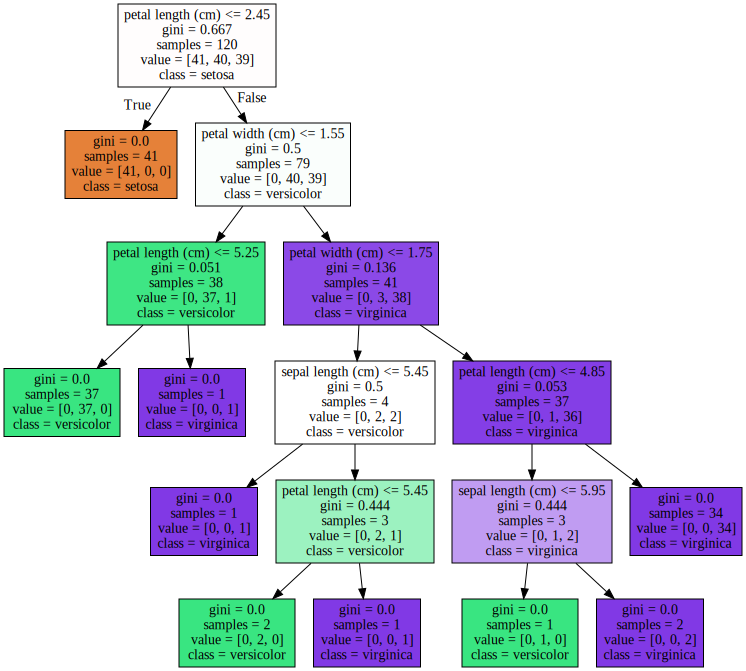

In [ ]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- petal length(cm) <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건, 이 조건이 없으면 리프 노드
- gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수
- samples는 현 규칙에 해당하는 데이터 건수
- value=[]는 클래스 값 기반의 데이터 건수, 붓꽃 데이터 세트는 클래스 값으로 0,1,2를 가지고 있으며, 0: setosa, 1: versicolor, 2: viriginica 품종을 가리킴

1번 노드 (루트 노드)

- samples = 120, 전체 데이터가 120개라는 의미
- values = [41,30,39]는 Setosa 41개, Versicolor 40개, Virginica 39개로 데이터 구성
- sample 120개가 values = [41,40,39] 분포도로 되어 있으므로 지니 계수는 0.667
- petal length(cm) <= 2.45 규칙으로 자식 노드 생성
- class = setosa는 하위 노드를 가질 경우에 setosa의 개수가 41개로 제일 많다는 의미

2번 노드 (리프 노드)

- petal length(cm) <= 2.45가 True
- 모든 데이터가 setosa로 결정, 더 이상 2번 노드에서 규칙을 만들 필요 없음
- 41개의 샘플 데이터 모두 Setosa이므로 예측 클래스는 Setosa로 결정
- 지니 계수는 0임

3번 노드 (규칙 노드)

- petal length(cm) <= 2.45가 False
- 79개의 샘플 데이터 중 Vesicolor 40개, Virginica 39갸로 여전히 지니 계수는 0.5로 높으므로 다음 자식 브랜치 노드로 분기할 규칙 필요
- petal length(cm) <= 1.55 규칙으로 자식 노드 생성

4번 노드 (규칙 노드)

- petal length(cm) <= 1.55가 True
- 38개의 샘플 데이터 중 Versicolor 37개, Virginica가 1개로 대부분이 Versicolor
- 지니 계수는 0.051로 매우 낮으나 여전히 Versicolor와 Virginica가 혼재되어 있으므로 petal length(cm) <= 5.25라는 새로운 규칙으로 자식 노드 생성

5번 노드 (규칙 노드)

- petal length(cm) <= 1.55가 False
- 41개의 샘플 데이터 중 Versicolor 3개, Virginica가 38개로 대부분이 Virginica
- 지니 계수는 0.136으로 낮으나 여전히 Versicolor와 Virginica가 혼재되어 있으므로 petal width(cm) <= 1.75라는 새로운 규칙으로 자식 노드 생성

각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미 ->  색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미

- 주황색은 Setosa(0)
- 초록색은 Versicolor(1)
- 보라색은 Virginica(2)

결정 트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만들어감 -> 과적합 문제점 가짐

결정 트리 알고리즘을 제어하는 대부분 하이퍼 파라미터는 복잡한 트리가 생성되는 것을 막기 위한 용도

- max_depth : 결정 트리의 최대 트리 깊이 제어, max_depth 제약없음보다 3으로 설정했을 때 더 간단한 결정 트리가 됨
- min_samples_split : 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수, 4로 설정하면 제약 없을 때보다 트리 깊이도 줄었고, 더욱 더 간결한 결정 트리가 만들어짐
- min_samples_leaf : 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값 지정, 디폴트는 1인데, 다른 클래스 값이 하나도 없이 단독 클래스로만 돼 있거나 단 한 개의 데이터로 돼 있을 경우에는 리프 노드가 될 수 있다는 것, 값을 키우면 더 이상 분할하지 않고, 리프노드가 될 수 있는 조건이 완화, 즉 min_samples_leaf <= 지정값 기준만 만족하면 리프 노드가 될 수 있음, 브랜치 노드가 줄어들고 결정 트리가 더 간결하게 만들어짐

사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 feature_importances_ 속성으로 제공

- feautre_importances_는 ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

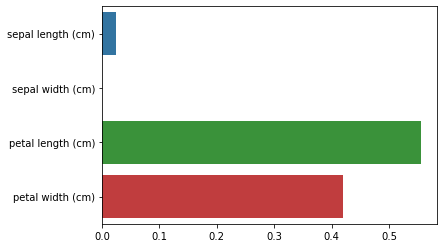

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
          
# feature importance를 column 별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

petal_length가 가장 피처 중요도가 높음


**결정 트리 과적합(Overfitting)**

사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 make_classification() 함수를 제공

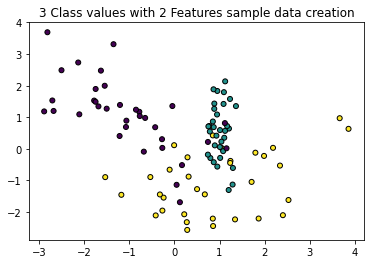

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features sample data creation")

# 2차원 시각화를 위해서는 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

NameError: name 'visualize_boundary' is not defined

### 3) 앙상블 학습 ###

**앙상블 학습 개요**

앙상블 학습을 통한 분류 : 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법, 대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 나타내고 있음

앙상블 학습의 유형은 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)의 세 가지로 나눌 수 있음 (이외에도 스태킹 등을 포함한 다양한 앙상블 방법이 있음)

- 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식, 다른 점은 보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것
- 보팅 분류기 : 선형 회귀, K 최근접 아웃, 서포트 벡터 머신이라는 3개의 ML 알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측결과를 선정하는 방식
- 배깅 분류기 : 단일 ML 알고리즘으로 여러 분류기가 학습으로 개별 예측을 함
    - 부트스트래핑(Bootstrapping) 분할 방식 : 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식
    - 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 방식
    - 배깅 방식은 중첩을 허용
- 부스팅 : 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에는 가중치를 부여하면서 학습과 예측을 진행하는 것
    - 대표적인 부스팅 모듈로 그래디언트 부스트, XGBoost, LightGBM
- 스태킹 : 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델로 재학습시켜 결과를 예측하는 방법


**보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)**

하드 보팅

- 다수결 원칙과 유사
- 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것

소프트 보팅

- 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정

일반적으로 소프트 보팅이 보팅 방법으로 적용 (예측 성능이 더 좋음)


**보팅 분류기(Voting Classifier)**

- 사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


VotingClassifier 클래스는 주요 생성 인자로 estimators와 voting 값을 입력 받음

- estimators : 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력 받음
- voting : 'hard' 시 하드 보팅, 'soft' 시 소프트 보팅 방식을 적용

In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델을 구현한 분류기
vo_clf = VotingClassifier(estimators = [('LR',lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별모델의 학습/예측/평가
classifiers=[lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도 : 0.9474
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386


- 보팅 분류기의 정확도가 조금 더 높게 나타남, 그러나 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지는 않음, 데이터의 특성과 분포 등 다양한 요건에 따라 기반 분류기 중 가장 좋은 분류기의 성능이 보팅했을 때보다 나을 수 있음
- ML 모델의 성능은 다양한 테스트 데이터에 의해 검증되므로 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 중요한 ML 모델의 평가요소가 됨
    - 편향-분산 트레이드 오프는 ML 모델이 극복해야 할 중요 과제 
- 결정 트리 알고리즘의 과적합이 발생하는 단점을 수십~수천 개의 많은 분류기를 결합해 다양한 상황을 학습하게 함으로써 극복하고 있음
    - 결정 트리 알고리즘의 장점은 그대로 취하고 단점은 보완하면서 편향-분산 트레이드 오프의 효과를 극대화
    

### 4) 랜덤 포레스트 ###

**랜덤 포레스트의 개요 및 실습**

배깅의 대표적인 알고리즘 랜덤 포레스트

- 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있고, 다양한 영역에서 높은 예측 성능을 보이고 있음
- 랜덤 포레스트의 기반 알고리즘 : 결정 트리
    - 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 됨
- 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터의 일부가 중첩되게 샘플링된 데이터 세트-> 부트스트래핑(Bootstrapping) 분할 방식
    - 랜덤 포레스트의 서브세트 데이터는 이러한 부트스트래핑으로 데이터가 임의로 만들어짐
    - 서브 세트의 데이터 건수는 전체 데이터 건수와 동일하지만 개별 데이터가 중첩되어 만들어짐
- 사이킷런은 RandomForestClassifier 클래스를 통해 랜덤 포레스트 기반의 분류를 지원

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
import pandas as pd

# 사용자 행동 데이터셋에 DataFrame을 반환하는 함수
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('c:/Temp/human_activity/features.txt',sep='\s+', 
                                  header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. Column 명은 feature_name 적용
    My_X_train = pd.read_csv('c:/Temp/human_activity/train/X_train.txt',sep='\s+', names = feature_name)
    My_X_test = pd.read_csv('c:/Temp/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    My_y_train = pd.read_csv('c:/Temp/human_activity/train/y_train.txt',sep='\s+',
                             header=None,names=['action'])
    My_y_test = pd.read_csv('c:/Temp/human_activity/test/y_test.txt',sep='\s+',
                            header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return My_X_train, My_X_test, My_y_train, My_y_test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


**랜덤 포레스트 하이퍼 파라미터 튜닝**

트리 기반 앙상블 알고리즘의 단점 : 하이퍼 파라미터가 너무 많고, 그로 인해서 튜닝을 위한 시간이 많이 소모, 또한 예측 성능이 향상되는 경우가 많지 않음

- n_estimators : 랜덤 포레스트에서 결정 트리의 개수를 지정, 디폴트는 10개, 많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되는 것은 아님, 늘릴수록 학습 수행 시간이 오래 걸리는 것도 감안해야 함
- max_features : 결정 트리에 사용된 max_features 파라미터와 같음, 하지만 RandomForestClassifier의 기본 max_features는 'None'이 아니라 'auto', 즉 'sqrt;와 같음
- max_depth나 min_samples_leaf와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에서도 똑같은 적용될 수 있음

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,16,20]
}

# RandomForesClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 :
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 : 0.9180


In [ ]:
# n_estimators를 300으로 증가시킴
rf_clf1  = RandomForestClassifier(n_estimators=300, max_depth=10,min_samples_leaf=8, 
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9253


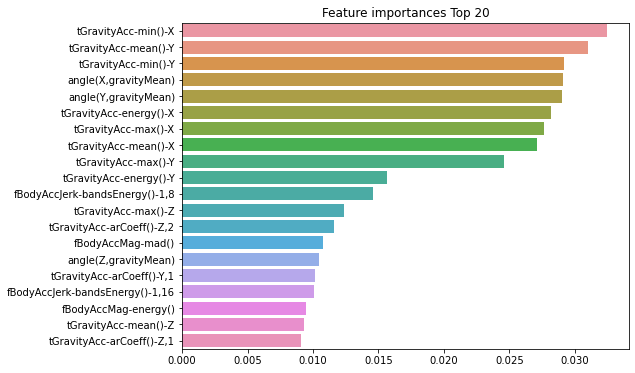

In [ ]:
# 피처 중요도 막대그래프로 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

tGravityAcc-min()-X, tGravityAcc-mean()-X, tGravityAcc-min()-Y 등이 높은 피처 중요도를 가지고 있음

### 5) GBM(Graident Boosting Machine) ###

**GBM의 개요 및 실습**

부스팅의 대표적인 구현은 AdaBoost와 그래디언트 부스트가 있음

- 에이다 부스트는 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘

에이다부스트가 어떻게 학습을 진행하는가?

- step1 : 첫번째 약한 학습기가 분류 기준 1로 +와 -를 분류한 것 (동그라미로 표시된 + 데이터는 + 데이터가 잘못 분류된 오류 데이터)
- step2 : 오류 데이터에 대해서 가중치 값을 부여, 가중치가 부여된 오류 + 데이터는 다음 약한 학습기가 더 잘 분류할 수 있게 크기가 커짐
- step3 : 두 번째 약한 학습기가 분류 기준 2로 +,-를 분류
- step4 : 잘못 분류된 - 오류 데이터에 대해 다음 약한 학습기가 잘 분류할 수 있게 더 큰 가중치를 부여 (오류 - 데아터의 크기가 커짐)
- step5 : 세 번째 약한 학습기가 분류 기준 3으로 +,-를 분류하고 오류 데이터 찾음, 에이다부스트는 이렇게 약한 학습기가 순차적으로 오류 값에 대해 가중치를 부여한 예측 결정 기준을 모두 결합해 예측을 수행
- 맨 아래는 1, 2, 3번째 약한 학습기를 모두 결합한 결과 예측, 개별 약한 학습기보다 정확도가 높아짐

GBM

- 에이다부스트와 유사하나, 가중치 업그레이드를 경사 하강법을 이용하는 것이 큰 치이
    - h(x) = y - F(x)를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는 것이 경사 하강법
- 사이킷런은 GBM 기반의 분류를 위해서 GradientBoostingClassifier 클래스 제공

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함, 시작 시간 설정
start_time = time.time()

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간 : {0:.1f}초'.format(time.time()-start_time))

- 일반적으로 GBM이 랜덤 포레스트보다는 예측 성능이 조금 뛰어난 경우가 많음, 그러나 수행시간이 오래 걸리 하이퍼 파라미터 튜닝 노력도 더 필요함
- 사이킷런의 GraidentBoostingClassifier는 약한 학습기의 순차적인 예측 오류 보정을 통해 학습을 수행하므로 멀티 CPU 코어 시스템을 사용하더라도 병렬 처리가 지원되지 않아서 대용량 데이터의 경우에 학습에 많은 시간이 필요, 반면 랜덤 포레스트의 경우 상대적으로 빠른 수행 시간 보장


**GBM 하이퍼 파리미터 튜닝**

- loss : 경사 하강법에 사용할 비용 함수를 지정. 특별한 이유가 없으면 'deciance'
- learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률. Weak learner가 순차적으로 오류값을 보정할 때 적용하는 계수. 0~1 사이의 값을 지정할 수 있고 기본값은 0.1
    - 너무 작은 값을 적용하면, 업데이트 되는 값이 작아져 최소 오류값을 찾아 예측 성능이 높아질 가능성이 높음, 하지만 수행 시간이 오래 걸리고, 너무 작게 설정하면 최소 오류값을 찾지 못할 수 있음
    - 너무 큰 값을 적용하면, 최소 오류 값을 찾지 못하고 그냥 지나쳐 예측 성능이 떨어질 가능성이 높아지지만, 빠른 수행이 가능
    - learning_rate와 n_estimators는 상호 보완적으로 조합해 사용
    - learning_rate를 작게 하고 n_estimators를 크게하면 더 이상 성능이 좋아지지 않는 한계점까지 예측 성능이 좋아질 수 있음, 그러나 수행시간이 오래 걸리는 단점이 있고, 예측 성능 역시 현격히 좋아지지는 않음
- n_estimators : weak learner의 개수, weak learner가 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 일정 수준까지는 좋아질 수 있으나 수행시간이 오래걸림, 기본값은 100
- subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율, 기본값은 1, 전체 데이터를 기반으로 학습한다는 의미, 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100,500],
    'learning_rate' : [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파리미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))